# Principal Writer, Director, And Actor

### Imports and File Read-ins 

In [9]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#file locations
directors_file = "files/imbd_files/directors.csv"
known_for_file= "files/imbd_files/known_for.csv"
movie_akas_file = "files/imbd_files/movie_akas.csv"
movie_basics_file = "files/imbd_files/movie_basics.csv"
movie_ratings_file= "files/imbd_files/movie_ratings.csv"
persons_file = "files/imbd_files/persons.csv"
principals_file= "files/imbd_files/principals.csv"
writers_file = "files/imbd_files/writers.csv"

# read files into dataframes
directors = pd.read_csv(directors_file)
known_for = pd.read_csv(known_for_file)
movie_akas = pd.read_csv(movie_akas_file)
movie_basics = pd.read_csv(movie_basics_file)
movie_ratings = pd.read_csv(movie_ratings_file)
persons = pd.read_csv(persons_file)
principals = pd.read_csv(principals_file)
writers = pd.read_csv(writers_file)

# Read in Data For Revenue Section
budgets = pd.read_csv('Files/tn.movie_budgets.csv.gz')

# list of tables for reference
IMBD_df_list = ['directors', 'known_for', 'movie_akas', 'movie_basics', 'movie_ratings', 'persons', 'principals', 'writers']

#### Preparation Of Revenues Data Frame

In [11]:
# Removing dollar signs from budget columns to allow for manipulation
budgets['production_budget'] = budgets['production_budget'].str.replace('$','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$','')
# Removing commas from budget columns to allow for manipulation
budgets['production_budget'] = budgets['production_budget'].str.replace(',','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',','')
#Dropping uneccesary rows
budgets = budgets.drop(columns=['id', 'release_date'])
# Rename movie row to primary_title for consistency with previous tables
budgets = budgets.rename(columns={'movie': 'primary_title'})
#Changing datatypes to int
budgets['production_budget'] = budgets['production_budget'].astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)
#adding net revenue columns
net = budgets.worldwide_gross - budgets.production_budget
budgets['net_revenue'] = net

## Directors, Writers, and Actors in Top 100 Movies

### Top 100 Movies Based On Rating

In [12]:
# merge movie ratings with movie basics to get top 100 movies based on Ratings
movie_info = pd.merge(movie_basics, movie_ratings, how="inner", on='movie_id')
# Sort movies by most votes and avereage rating
top_movies_pop = movie_info.sort_values(by=['numvotes', 'averagerating'], ascending=False)
# top 100 movies selected
top_100_pop = top_movies_pop.iloc[:100]
# top 100 movies sorted specifically by movie rating
top_100_pop = top_100_pop.sort_values(by='averagerating', ascending=False)
#index reseted for top 100 movies
top_100_pop = top_100_pop.reset_index().drop(columns='index')
# select columns renamed for consistency among columns
top_100_pop = top_100_pop.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})

### Top 100 Movies Based on Net Revenue

In [13]:
# Merge movie basics and budget to get top 100 movies based on revenue.
rev_movie_info = pd.merge(movie_basics, budgets, how='inner', on='primary_title')
# Sort movies by net_revenue
top_rev_movies = rev_movie_info.sort_values(by='net_revenue', ascending=False)
# top 100 movies selected 
top_100_rev = top_rev_movies.iloc[:100]

#### persons table preparation

In [14]:
persons = persons[persons.death_year.isnull()]

In [15]:
persons


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


## Directors in the Top 100 Movies

In [17]:
# merge movie directors with top 100 movies based on Rating
top_movie_dir = pd.merge(top_100_pop, directors, how="inner", on='movie_id')
# merge persons table with top movie directors to get director names
top_movie_dir = pd.merge(top_movie_dir, persons, how="inner", on='person_id')
# drop duplicate movies
top_movie_dir.drop_duplicates(subset=['movie_id'], inplace=True)
# Count number of times director appears in the top 100 movies based on ratings
top_pop_director_counts = top_movie_dir.primary_name.value_counts().iloc[:25]

# Merge top 100 movies based on revenue and directors into one dataframe, 
top_100_dir = pd.merge(top_100_rev, directors, how='inner', on='movie_id')
# merge persons table with top movie directors to get director names
top_100_dir = pd.merge(top_100_dir, persons, how='inner', on='person_id')
# drop duplicate movies
top_100_dir.drop_duplicates(subset=['movie_id'], inplace=True)
# Count number of times director appears in the top 100 movies based on ratings and select top 25 results
top_rev_dir_counts = top_100_dir.primary_name.value_counts().iloc[:25]

#Merge director counts in from top 100 rated movies with director counts in top 100 movies based on revenue
top_rev_dir_df = top_rev_dir_counts.to_frame()
top_pop_dir_df = top_pop_director_counts.to_frame()
top_director_counts = pd.merge(top_pop_dir_df, top_rev_dir_df, how="outer", left_index=True, right_index=True)

#Change all null values to zero (zero counts)
top_director_counts = top_director_counts.fillna(0)
# Reset Index for easier plotting
top_director_counts.reset_index(inplace=True)
#Rename columns to clearly represent the data
top_director_counts.rename(columns= {'index': 'Directors', 'primary_name_x' :'Top 100 Movies Based on Rating', 'primary_name_y' :'Top 100 Movies Based on Net Revenue'}, inplace=True)
#Sort the values on both columns in descending order
top_director_counts.sort_values(by=['Top 100 Movies Based on Rating', 'Top 100 Movies Based on Net Revenue'] , ascending=False, inplace=True)

### Number of Times Directors Appear in the Top 100 Movies 

C:\Users\chrchristensen\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1373: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


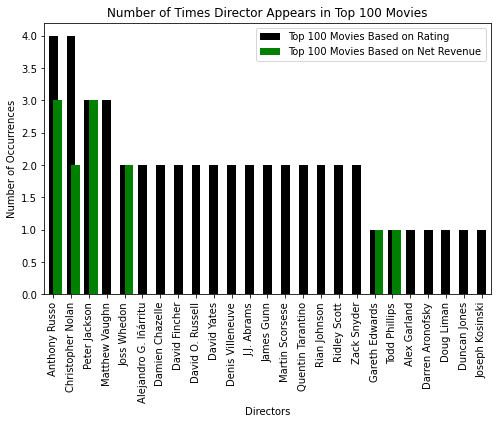

In [18]:
#Plot the count of revenue and rating for each director
top_director_counts.iloc[:25].plot(kind='bar', 
                                   x='Directors', 
                                   title='Number of Times Director Appears in Top 100 Movies', 
                                   color = ['Black','Green'],
                                   alpha=1,
                                   figsize=(8, 5),
                                   Width=.5,
                                   ylabel='Number of Occurrences',
                                   xlabel='Directors');

### Net Revenue Associated with Directors

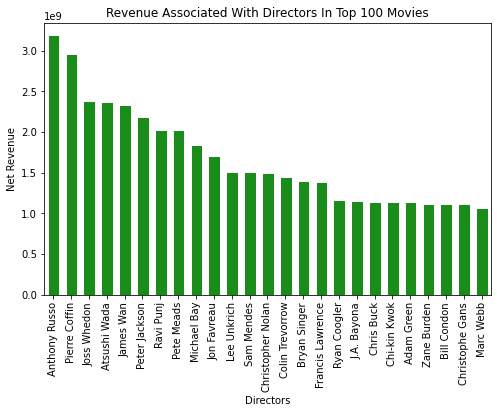

In [19]:
# Net Revenue of 100 movies grouped by director
top_dir_groupby = top_100_dir.groupby('primary_name').sum().sort_values(by='net_revenue', ascending=False)
# Select only top 25 results
top_dir_groupby = top_dir_groupby.net_revenue.iloc[:25]
top_rev_director = top_dir_groupby
top_rev_director.plot(kind='bar', 
                      title='Revenue Associated With Directors In Top 100 Movies', 
                      figsize=(8, 5), 
                      xlabel = 'Directors', 
                      ylabel='Net Revenue', 
                      color='Green', 
                      alpha=.9,
                      Width=.6);

## Writers In Top 100 Movies

In [20]:
# merge movie writers with top 100 Rated Movies
top_writers = pd.merge(top_100_pop, writers, how="inner", on='movie_id')
# merge persons with top movie directors to get director names
top_writers = pd.merge(top_writers, persons, how="inner", on='person_id')
# drop duplicate movies
top_writers.drop_duplicates(subset=['movie_id'], inplace=True)
# count of writers in top 100 rated movies and select top 25
top_pop_writer_counts = top_writers.primary_name.value_counts().iloc[:25]

# Merge Top 100 movies based on Revenue and writers into one dataframe, 
top_100_writers = pd.merge(top_100_rev, writers, how='inner', on='movie_id')
# merge persons with top movie directors to get director names
top_100_writers = pd.merge(top_100_writers, persons, how='inner', on='person_id')
# drop duplicate movies
top_100_writers.drop_duplicates(subset=['movie_id'], inplace=True)
# Count writers in top 100 moveis based on revenue
top_rev_writer_counts = top_100_writers.primary_name.value_counts().iloc[:15]

# Group 100 top movies based on revenue by writer to get sum net revenue per writer
top_writer_groupby = top_100_writers.groupby('primary_name').sum().sort_values(by='net_revenue', ascending=False)
# Select only top 25
top_writer_groupby = top_writer_groupby.net_revenue.iloc[:25]

#create dataframes of writer counts in top 100 moves and merge them together
top_rev_writer_df = top_rev_writer_counts.to_frame()
top_pop_writer_df = top_pop_writer_counts.to_frame()
top_writer_counts = pd.merge(top_pop_writer_df, top_rev_writer_df, how="outer", left_index=True, right_index=True)
#Change all null values to zero to represent that there are none in the top 100 movies in that category
top_writer_counts = top_writer_counts.fillna(0)
# Reset Index for easier plotting
top_writer_counts.reset_index(inplace=True)
#Rename the columns to more clearly reflect data
top_writer_counts.rename(columns= {'index': 'Writers', 'primary_name_x' :'Top 100 Movies Based on Rating', 'primary_name_y' :'Top 100 Movies Based on Net Revenue'}, inplace=True)
# Sort values in descending order
top_writer_counts.sort_values(by=['Top 100 Movies Based on Rating', 'Top 100 Movies Based on Net Revenue'] , ascending=False, inplace=True)

### Number of Times Writers Appear in the Top 100 Movies

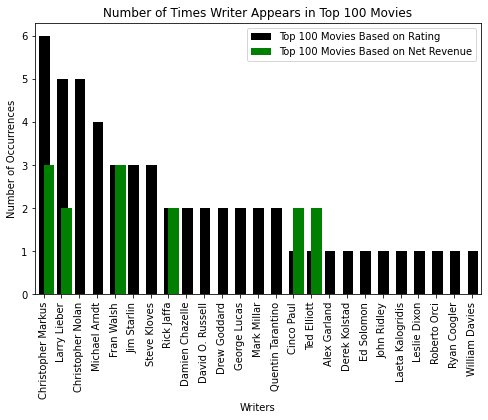

In [21]:
#Plot the count of revenue and rating for each writer in top 100 movies
top_writer_counts.iloc[:25].plot(kind='bar', 
                       x='Writers', 
                       title='Number of Times Writer Appears in Top 100 Movies', 
                       color = ['Black','Green'],
                       alpha=1,
                       figsize=(8, 5),
                       Width=.6,
                       ylabel='Number of Occurrences',
                       xlabel='Writers');


### Net Revenue Associated With Writers in the Top 100 Movies

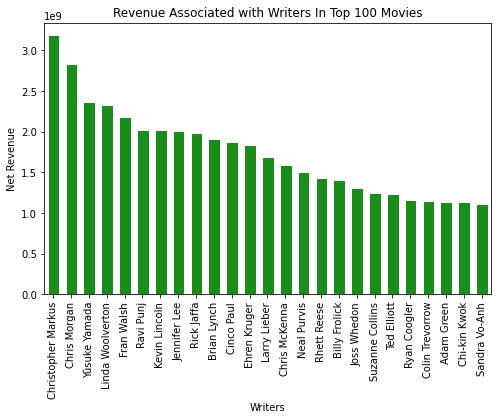

In [22]:
# Plot of net revenue groupby
top_rev_writer = top_writer_groupby
top_rev_writer.plot(kind='bar', 
                      title='Revenue Associated with Writers In Top 100 Movies', 
                      figsize=(8, 5), 
                      xlabel = 'Writers', 
                      ylabel='Net Revenue', 
                      color='Green', 
                      alpha=.9,
                      Width=.6);

## Actors in the Top 100 Movies

In [26]:
# Drop Duplicate Values
top_principal_actors.drop_duplicates(subset=['movie_id'], inplace=True)
# count of principal actor appearing in top 100 movies and select for top 25
top_pop_actor_counts = top_principal_actors.primary_name.value_counts().iloc[:25]
# Merging principals and persons tables to obtain actor information
top_100_princ = pd.merge(top_100_rev, principals, how="inner", on='movie_id')
top_100_actors = pd.merge(top_100_princ, persons, how="inner", on='person_id')
# Count of actors appearing in top 100 movies based on net revenue
top_rev_actor_counts = top_100_actors.primary_name.value_counts().iloc[:25]

#Create dataframe of count results in top 100 rated movies and top 100 movies based on net revenue
top_rev_actors_df = top_rev_actor_counts.to_frame()
top_pop_actors_df = top_pop_actor_counts.to_frame()
# Merge both dataframes together
top_actor_counts = pd.merge(top_pop_actors_df, top_rev_actors_df, how="outer", left_index=True, right_index=True)
#Change all null values to zero
top_actor_counts = top_actor_counts.fillna(0)
# Reset Index for easier plotting
top_actor_counts.reset_index(inplace=True)
#Rename columns to more clearly represent data
top_actor_counts.rename(columns= {'index': 'Actors', 'primary_name_x' :'Top 100 Movies Based on Rating', 'primary_name_y' :'Top 100 Movies Based on Net Revenue'}, inplace=True)
#Sort Values in descending order
top_actor_counts.sort_values(by=['Top 100 Movies Based on Rating', 'Top 100 Movies Based on Net Revenue'] , ascending=False, inplace=True)
# Net Revenue of top 100 movies grouped by actor
top_actor_groupby = top_100_actors.groupby('primary_name').sum().sort_values(by='net_revenue', ascending=False)
#select top 25 results to plot
top_actor_groupby = top_actor_groupby.net_revenue.iloc[:25]

<ipython-input-26-3681d3985544>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_principal_actors.drop_duplicates(subset=['movie_id'], inplace=True)


### Number Of Times Actors Appear in the Top 100 Movies

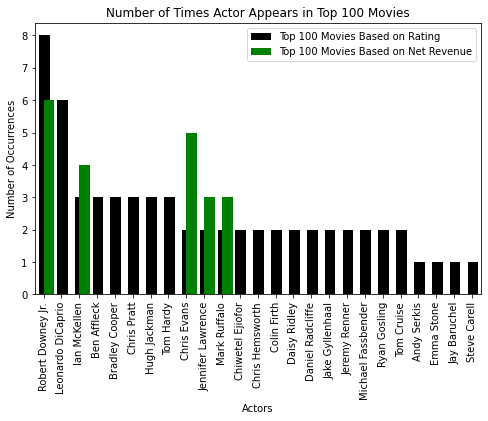

In [27]:
#Plot the count of revenue and rating for each actor in top 100 movies
top_actor_counts.iloc[:25].plot(kind='bar', 
                       x='Actors', 
                       title='Number of Times Actor Appears in Top 100 Movies', 
                       color = ['Black','Green'],
                       alpha=1,
                       figsize=(8, 5),
                       Width=.6,
                       ylabel='Number of Occurrences',
                       xlabel='Actors');

### Revenue Associated with Actors in the Top 100 Movies

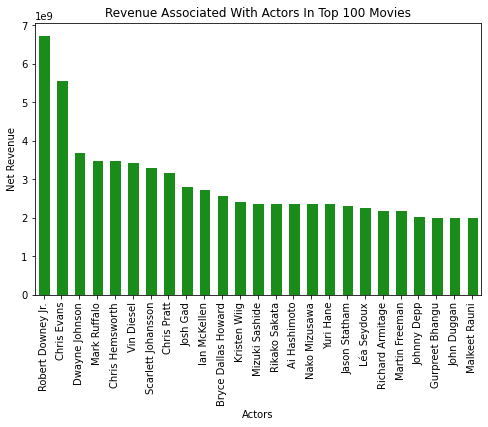

In [22]:
# plot results of group by to display movie net revenues associated with each actor
top_rev_actor = top_actor_groupby
top_rev_actor.plot(kind='bar', 
                      title='Revenue Associated With Actors In Top 100 Movies', 
                      figsize=(8, 5), 
                      xlabel = 'Actors', 
                      ylabel='Net Revenue', 
                      color='Green', 
                      alpha=.9,
                      Width=.6);